<font size="+3"><strong>ARMA Models</strong></font>

In [1]:
import inspect
import time
import warnings

import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
from IPython.display import VimeoVideo
from pymongo import MongoClient
from sklearn.metrics import mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'pymongo'

# Prepare Data

## Import

**Task 3.4.1:** Create a client to connect to the MongoDB server, then assign the `"air-quality"` database to `db`, and the `"nairobi"` collection to `nairobi`.

- [<span id='technique'>Create a client object for a <span id='tool'>MongoDB</span> instance.](../%40textbook/11-databases-mongodb.ipynb#Servers-and-Clients) 
- [<span id='technique'>Access a database using <span id='tool'>PyMongo.](../%40textbook/11-databases-mongodb.ipynb#Servers-and-Clients)
- [<span id='technique'>Access a collection in a database using <span id='tool'>PyMongo.](../%40textbook/11-databases-mongodb.ipynb#Collections)

In [4]:
client = MongoClient(host='localhost', port=27017)
db = client['air-quality']
nairobi = db['nairobi']

NameError: name 'MongoClient' is not defined

In [5]:
def wrangle(collection, resample_rule='1H'):

    results = collection.find(
        {"metadata.site": 29, "metadata.measurement": "P2"},
        projection={"P2": 1, "timestamp": 1, "_id": 0},
    )

    # Read results into DataFrame
    df = pd.DataFrame(list(results)).set_index("timestamp")

    # Localize timezone
    df.index = df.index.tz_localize("UTC").tz_convert("Africa/Nairobi")

    # Remove outliers
    df = df[df["P2"] < 500]

    # Resample and forward-fill
    y = df['P2'].resample(resample_rule).mean().fillna(method='ffill')

    return y

**Task 3.4.4:** Create an ACF plot for the data in `y`. Be sure to label the x-axis as `"Lag [hours]"` and the y-axis as `"Correlation Coefficient"`.

- [What's an <span id='term'>ACF plot?](../%40textbook/17-ts-core.ipynb#ACF-Plot)
- [<span id='technique'>Create an ACF plot using <span id='tool'>statsmodels](../%40textbook/18-ts-models.ipynb#Creating-an-ACF-Plot)

NameError: name 'plot_acf' is not defined

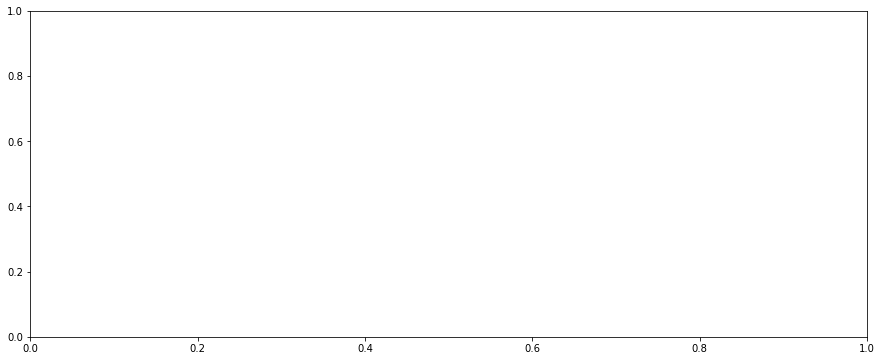

In [7]:
fig, ax = plt.subplots(figsize=(15,6))

plot_acf(y, ax=ax)
plt.xlabel("Lag [hours]")
plt.ylabel("Correlation Coefficient")

**Task 3.4.5:** Create an PACF plot for the data in `y`. Be sure to label the x-axis as `"Lag [hours]"` and the y-axis as `"Correlation Coefficient"`.

- [What's an <span id='term'>PACF plot?](../%40textbook/17-ts-core.ipynb#PACF-Plot)
- [<span id='technique'>Create an PACF plot using <span id='tool'>statsmodels](../%40textbook/18-ts-models.ipynb#Creating-a-PACF-Plot)

NameError: name 'plot_pacf' is not defined

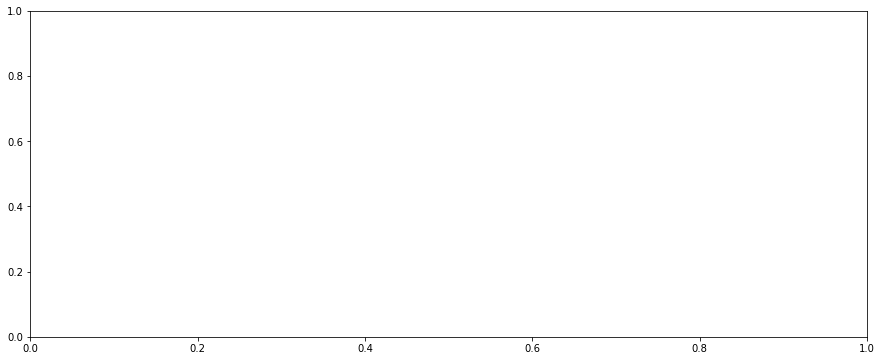

In [9]:
fig, ax = plt.subplots(figsize=(15,6))

plot_pacf(y, ax=ax)
plt.xlabel("Lag [hours]")
plt.ylabel("Correlation Coefficient")

## Split

**Task 3.4.6:** Create a training set `y_train` that contains only readings from October 2018, and a test set `y_test` that contains readings from November 1, 2018.

- [<span id='technique'>Subset a DataFrame by selecting one or more rows in <span id='tool'>pandas.](../%40textbook/04-pandas-advanced.ipynb#Subsetting-with-Masks)

In [12]:
y_train = y['2018-10']
y_test = y['2018-11-01']

NameError: name 'y' is not defined

# Build Model

## Baseline

**Task 3.4.7:** Calculate the baseline mean absolute error for your model.

In [16]:
y_train_mean = y_train.mean()
y_pred_baseline = [y_train_mean] * len(y_train)
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)


print("Mean P2 Reading:", round(y_train_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

NameError: name 'y_train' is not defined

## Iterate

**Task 3.4.8:** Create ranges for possible $p$ and $q$ values. `p_params` should range between 0 and 25, by steps of 8. `q_params` should range between 0 and 3 by steps of 1.

- [What's a <span id='term'>hyperparameter?](../%40textbook/17-ts-core.ipynb#Hyperparameters)
- [What's an <span id='term'>iterator?](../%40textbook/02-python-advanced.ipynb#Iterators-and-Iterables-)
- [<span id='technique'>Create a range in <span id='tool'>Python.](../%40textbook/18-ts-models.ipynb#Hyperparameters)

In [19]:
p_params = range(0, 25, 8)
q_params = range(0, 3, 1)

**Task 3.4.9:** Complete the code below to train a model with every combination of hyperparameters in `p_params` and `q_params`. Every time the model is trained, the mean absolute error is calculated and then saved to a dictionary. If you're not sure where to start, do the code-along with Nicholas!

- [What's an <span id='term'>ARMA model?](../%40textbook/17-ts-core.ipynb#ARMA-Models)
- [<span id='technique'>Append an item to a list in <span id='tool'>Python.](../%40textbook/01-python-getting-started.ipynb#Appending-Items)
- [<span id='technique'>Calculate the mean absolute error for a list of predictions in <span id='tool'>scikit-learn.](../%40textbook/15-ml-regression.ipynb#Calculating-the-Mean-Absolute-Error-for-a-List-of-Predictions)
- [<span id='technique'>Instantiate a predictor in <span id='tool'>statsmodels.](../%40textbook/18-ts-models.ipynb#Iterating)
- [<span id='technique'>Train a model in <span id='tool'>statsmodels.](../%40textbook/18-ts-models.ipynb#Iterating)
- [<span id='technique'>Write a for loop in <span id='tool'>Python.](../%40textbook/01-python-getting-started.ipynb#Working-with-for-Loops)

In [21]:
# Create dictionary to store MAEs
mae_grid = dict()
# Outer loop: Iterate through possible values for `p`
for p in p_params:
    # Create key-value pair in dict. Key is `p`, value is empty list.
    mae_grid[p] = list()
    # Inner loop: Iterate through possible values for `q`
    for q in q_params:
        # Combination of hyperparameters for model
        order = (p, 0, q)
        # Note start time
        start_time = time.time()
        # Train model
        model = ARIMA(y_train, order=order).fit()
        # Calculate model training time
        elapsed_time = round(time.time() - start_time, 2)
        print(f"Trained ARIMA {order} in {elapsed_time} seconds.")
        # Generate in-sample (training) predictions
        y_pred = model.predict()
        # Calculate training MAE
        mae = mean_absolute_error(y_pred, y_train)
        # Append MAE to list in dictionary
        mae_grid[p].append(mae)

print()
print(mae_grid)

NameError: name 'ARIMA' is not defined

**Task 3.4.10:** Organize all the MAE's from above in a DataFrame names `mae_df`. Each row represents a possible value for $q$ and each column represents a possible value for $p$. 

- [<span id='technique'>Create a DataFrame from a dictionary using <span id='tool'>pandas.](../%40textbook/03-pandas-getting-started.ipynb#Working-with-DataFrames)

In [23]:
mae_df = pd.DataFrame(mae_grid)
mae_df.round(4)

,0


**Task 3.4.11:** Create heatmap of the values in `mae_grid`. Be sure to label your x-axis `"p values"` and your y-axis `"q values"`. 

- [<span id='technique'>Create a heatmap in <span id='tool'>seaborn.](../%40textbook/09-visualization-seaborn.ipynb#Correlation-Heatmaps)

In [25]:
sns.heatmap(mae_df, cmap='Blues')
plt.xlabel("p values")
plt.ylabel('q values')
plt.title('ARMA Grid Search (Criterion: MAE)');

ValueError: zero-size array to reduction operation fmin which has no identity

**Task 3.4.12:** Use the [`plot_diagnostics`](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMAResults.plot_diagnostics.html) method to check the residuals for your model. Keep in mind that the plot will represent the residuals from the last model you trained, so make sure it was your best model, too!

- [<span id='technique'>Examine time series model residuals using <span id='tool'>statsmodels.](../%40textbook/18-ts-models.ipynb#Residuals)

NameError: name 'model' is not defined

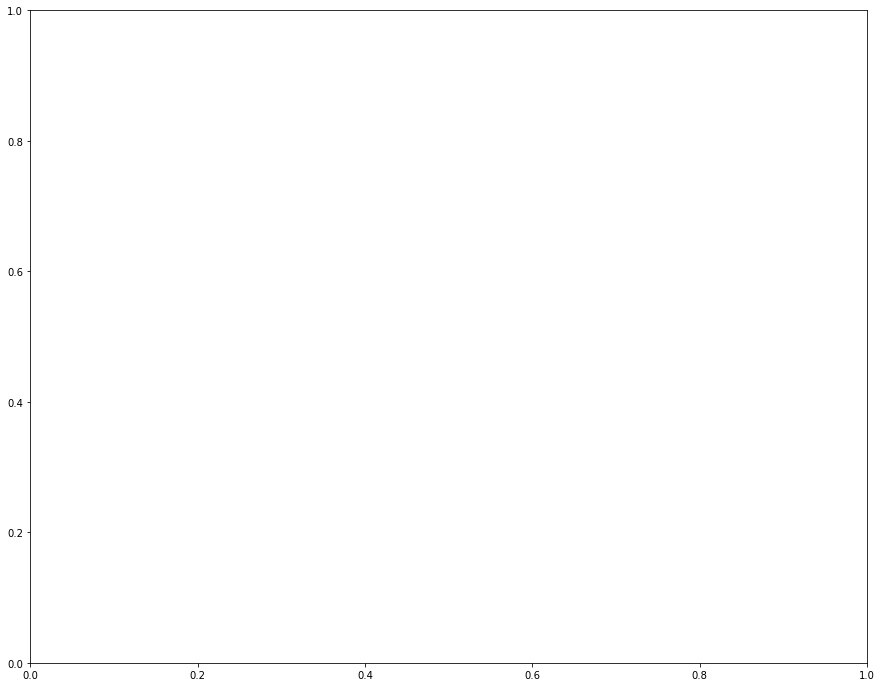

In [27]:
fig, ax = plt.subplots(figsize=(15, 12))

model.plot_diagnostics(fig = fig);

In [28]:
## Evaluate

In [29]:
y_pred_wfv = pd.Series()
history = y_train.copy()
for i in range(len(y_test)):
    model = ARIMA(history, order=(8, 0, 1)).fit()
    next_pred = model.forecast()
    y_pred_wfv = y_pred_wfv.append(next_pred)
    history = history.append(y_test[next_pred.index])

/var/folders/6b/jym9hwcx2dq3sjt85lgryhhm0000gn/T/ipykernel_37934/2165644159.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  y_pred_wfv = pd.Series()


NameError: name 'y_train' is not defined

In [30]:
test_mae = mean_absolute_error(y_pred_wfv, y_test)
print("Test MAE (walk forward validation):", round(test_mae, 2))

NameError: name 'mean_absolute_error' is not defined

In [31]:
# Communicate Results

In [32]:
**Task 3.4.14:** First, generate the list of training predictions for your model. Next, create a DataFrame `df_predictions` with the true values `y_test` and your predictions `y_pred_wfv` (don't forget the index). Finally, plot `df_predictions` using plotly express. Make sure that the y-axis is labeled `"P2"`. 

- [<span id='technique'>Generate in-sample predictions for a model in <span id='tool'>statsmodels.](../%40textbook/18-ts-models.ipynb#Iterating)
- [<span id='technique'>Create a DataFrame from a dictionary using <span id='tool'>pandas.](../%40textbook/03-pandas-getting-started.ipynb#Working-with-DataFrames)
- [<span id='technique'>Create a line plot in <span id='tool'>pandas.](../%40textbook/07-visualization-pandas.ipynb#Line-Plots)    

SyntaxError: invalid syntax (3848351181.py, line 1)

In [ ]:
df_predictions = pd.DataFrame(
    {'y_test': y_test,
     'y_pred_wfv': y_pred_wfv}
     )
fig = px.line(df_predictions, ax=ax, ylable='P2')
fig.show()